## Imports

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Globals

In [12]:
CLASS_LABELS = ['non-violent','violent']
LABELS_COUNT = len(CLASS_LABELS)

DATASET_PATH = 'Dataset/dataset.csv'

TRAIN_SPLIT = 0.8

EPOCHS = 20

## Import Dataset

In [13]:
#Import Dataset
data = pd.read_csv(DATASET_PATH).values

data[data == "non-violent"] = 0
data[data == "violent"] = 1

data = data.astype('float32')

#Shuffle Data
for x in range(100):
    np.random.shuffle(data)

TRAIN_AMOUNT = int(data.shape[0] * TRAIN_SPLIT)
BATCH_SIZE = 32

## Split Dataset

In [14]:
#Split Data into Train and Test
train = data[0:TRAIN_AMOUNT]
test = data[TRAIN_AMOUNT:]

#Extract Data and Reshape to (19,2,3)
x_train = np.reshape(train[:, 1:],(train.shape[0],19,3,2)).swapaxes(2,3)
x_test = np.reshape(test[:, 1:],(test.shape[0],19,3,2)).swapaxes(2,3)

#Extract Labels
y_train = train[:,0]
y_test = test[:,0]

## Build Model

In [15]:
my_model = Sequential()

k.set_image_data_format('channels_first')

my_model.add(Convolution2D(32, 3, padding="same", activation="relu", input_shape=(19,2,3)))
my_model.add(MaxPooling2D((2,2), padding='same'))

my_model.add(Convolution2D(32, 3, padding="same", activation="relu"))
my_model.add(MaxPooling2D((2,2), padding='same'))

my_model.add(Convolution2D(64, 3, padding="same", activation="relu"))
my_model.add(MaxPooling2D((2,2), padding='same'))

my_model.add(Dropout(0.4))

my_model.add(Flatten())

my_model.add(Dense(128,activation="relu"))
my_model.add(Dense(1, activation="sigmoid"))

## Train Model

In [16]:
# Compile Model
my_model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])

#Train Model
history = my_model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data = (x_test, y_test))

Epoch 1/20
5/5 [==============================] - 1s 87ms/step - loss: 5.5248 - accuracy: 0.6718 - val_loss: 54.5197 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 1.8813 - accuracy: 0.9313 - val_loss: 40.6070 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 1.3019 - accuracy: 0.8779 - val_loss: 12.7488 - val_accuracy: 0.2121
Epoch 4/20
5/5 [==============================] - 0s 14ms/step - loss: 1.2839 - accuracy: 0.8550 - val_loss: 39.9564 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 1.9014 - accuracy: 0.9389 - val_loss: 52.3527 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 2.0968 - accuracy: 0.9313 - val_loss: 37.4648 - val_accuracy: 0.000

## Model Evaluation

In [17]:
#Evaluate Model
score = my_model.evaluate(x_test, y_test, batch_size=EPOCHS)

my_model.summary()

2/2 [==============================] - 0s 4ms/step - loss: 9.8975 - accuracy: 0.4545
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 2, 3)          5504      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 1, 2)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 1, 2)          9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 1, 1)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)       

## Plot Graphs

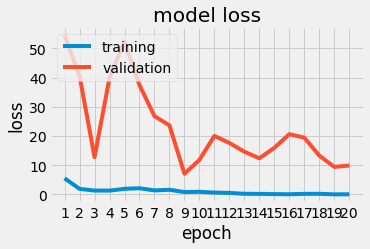

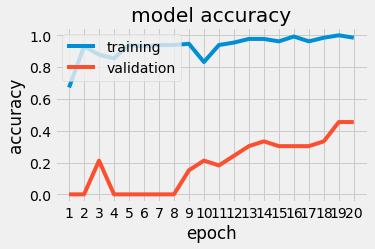

In [18]:
plt.style.use('fivethirtyeight')

xepochs = [i+1 for i in range(0, len(history.history['loss']))]
plt.figure(figsize=(5,3))

# Loss
plt.plot(xepochs, history.history['loss'])
plt.plot(xepochs, history.history['val_loss'])
plt.xticks(xepochs)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# Accuracy
plt.figure(figsize=(5,3))
plt.plot(xepochs, history.history['accuracy'])
plt.plot(xepochs, history.history['val_accuracy'])
plt.xticks(xepochs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

## Classification Report

In [19]:
predictions = my_model.predict(x_test)

#FIRST VERSION??
pred_class = np.argmax(predictions,axis=1)

#SECOND VERSION??
pred_class_1 = []

for x in predictions:
    if x == 1:
        pred_class_1.append(1)
    else:
        pred_class_1.append(0)

print(y_test)
print(pred_class)
print(pred_class_1)

print(classification_report(y_test, pred_class, target_names=['non-violent', 'violent']))
print(classification_report(y_test, pred_class_1, target_names=['non-violent', 'violent']))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

 non-violent       0.00      0.00      0.00       0.0
     violent       0.00      0.00      0.00      33.0

    accuracy                           0.00      33.0
   macro avg       0.00      0.00      0.00      33.0
weighted avg       0.00      0.00      0.00      33.0

              precision    recall  f1-score   support

 non-violent       0.00      0.00      0.00         0
     violent       1.00      0.24      0.39        33

    accuracy                           0.24        33
   macro avg       0.50      0.12      0.20        33
weighted avg       1.00      0.24      0.39        33



C:\Users\Sean\anaconda3\envs\ThesisEnv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sean\anaconda3\envs\ThesisEnv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sean\anaconda3\envs\ThesisEnv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sean\anacond

## Export Model and Weights

In [20]:
# serialize to JSON
json_file = my_model.to_json()
with open("ViolentModel/violent_model_json", "w") as file:
   file.write(json_file)

# serialize weights to HDF5
my_model.save_weights("ViolentModel/violent_model_weights.h5")